# Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/Users/kmarkov//Documents/final_df_5_stages_stand.csv")


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['5_stages'])  # Extract features excluding the label column

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

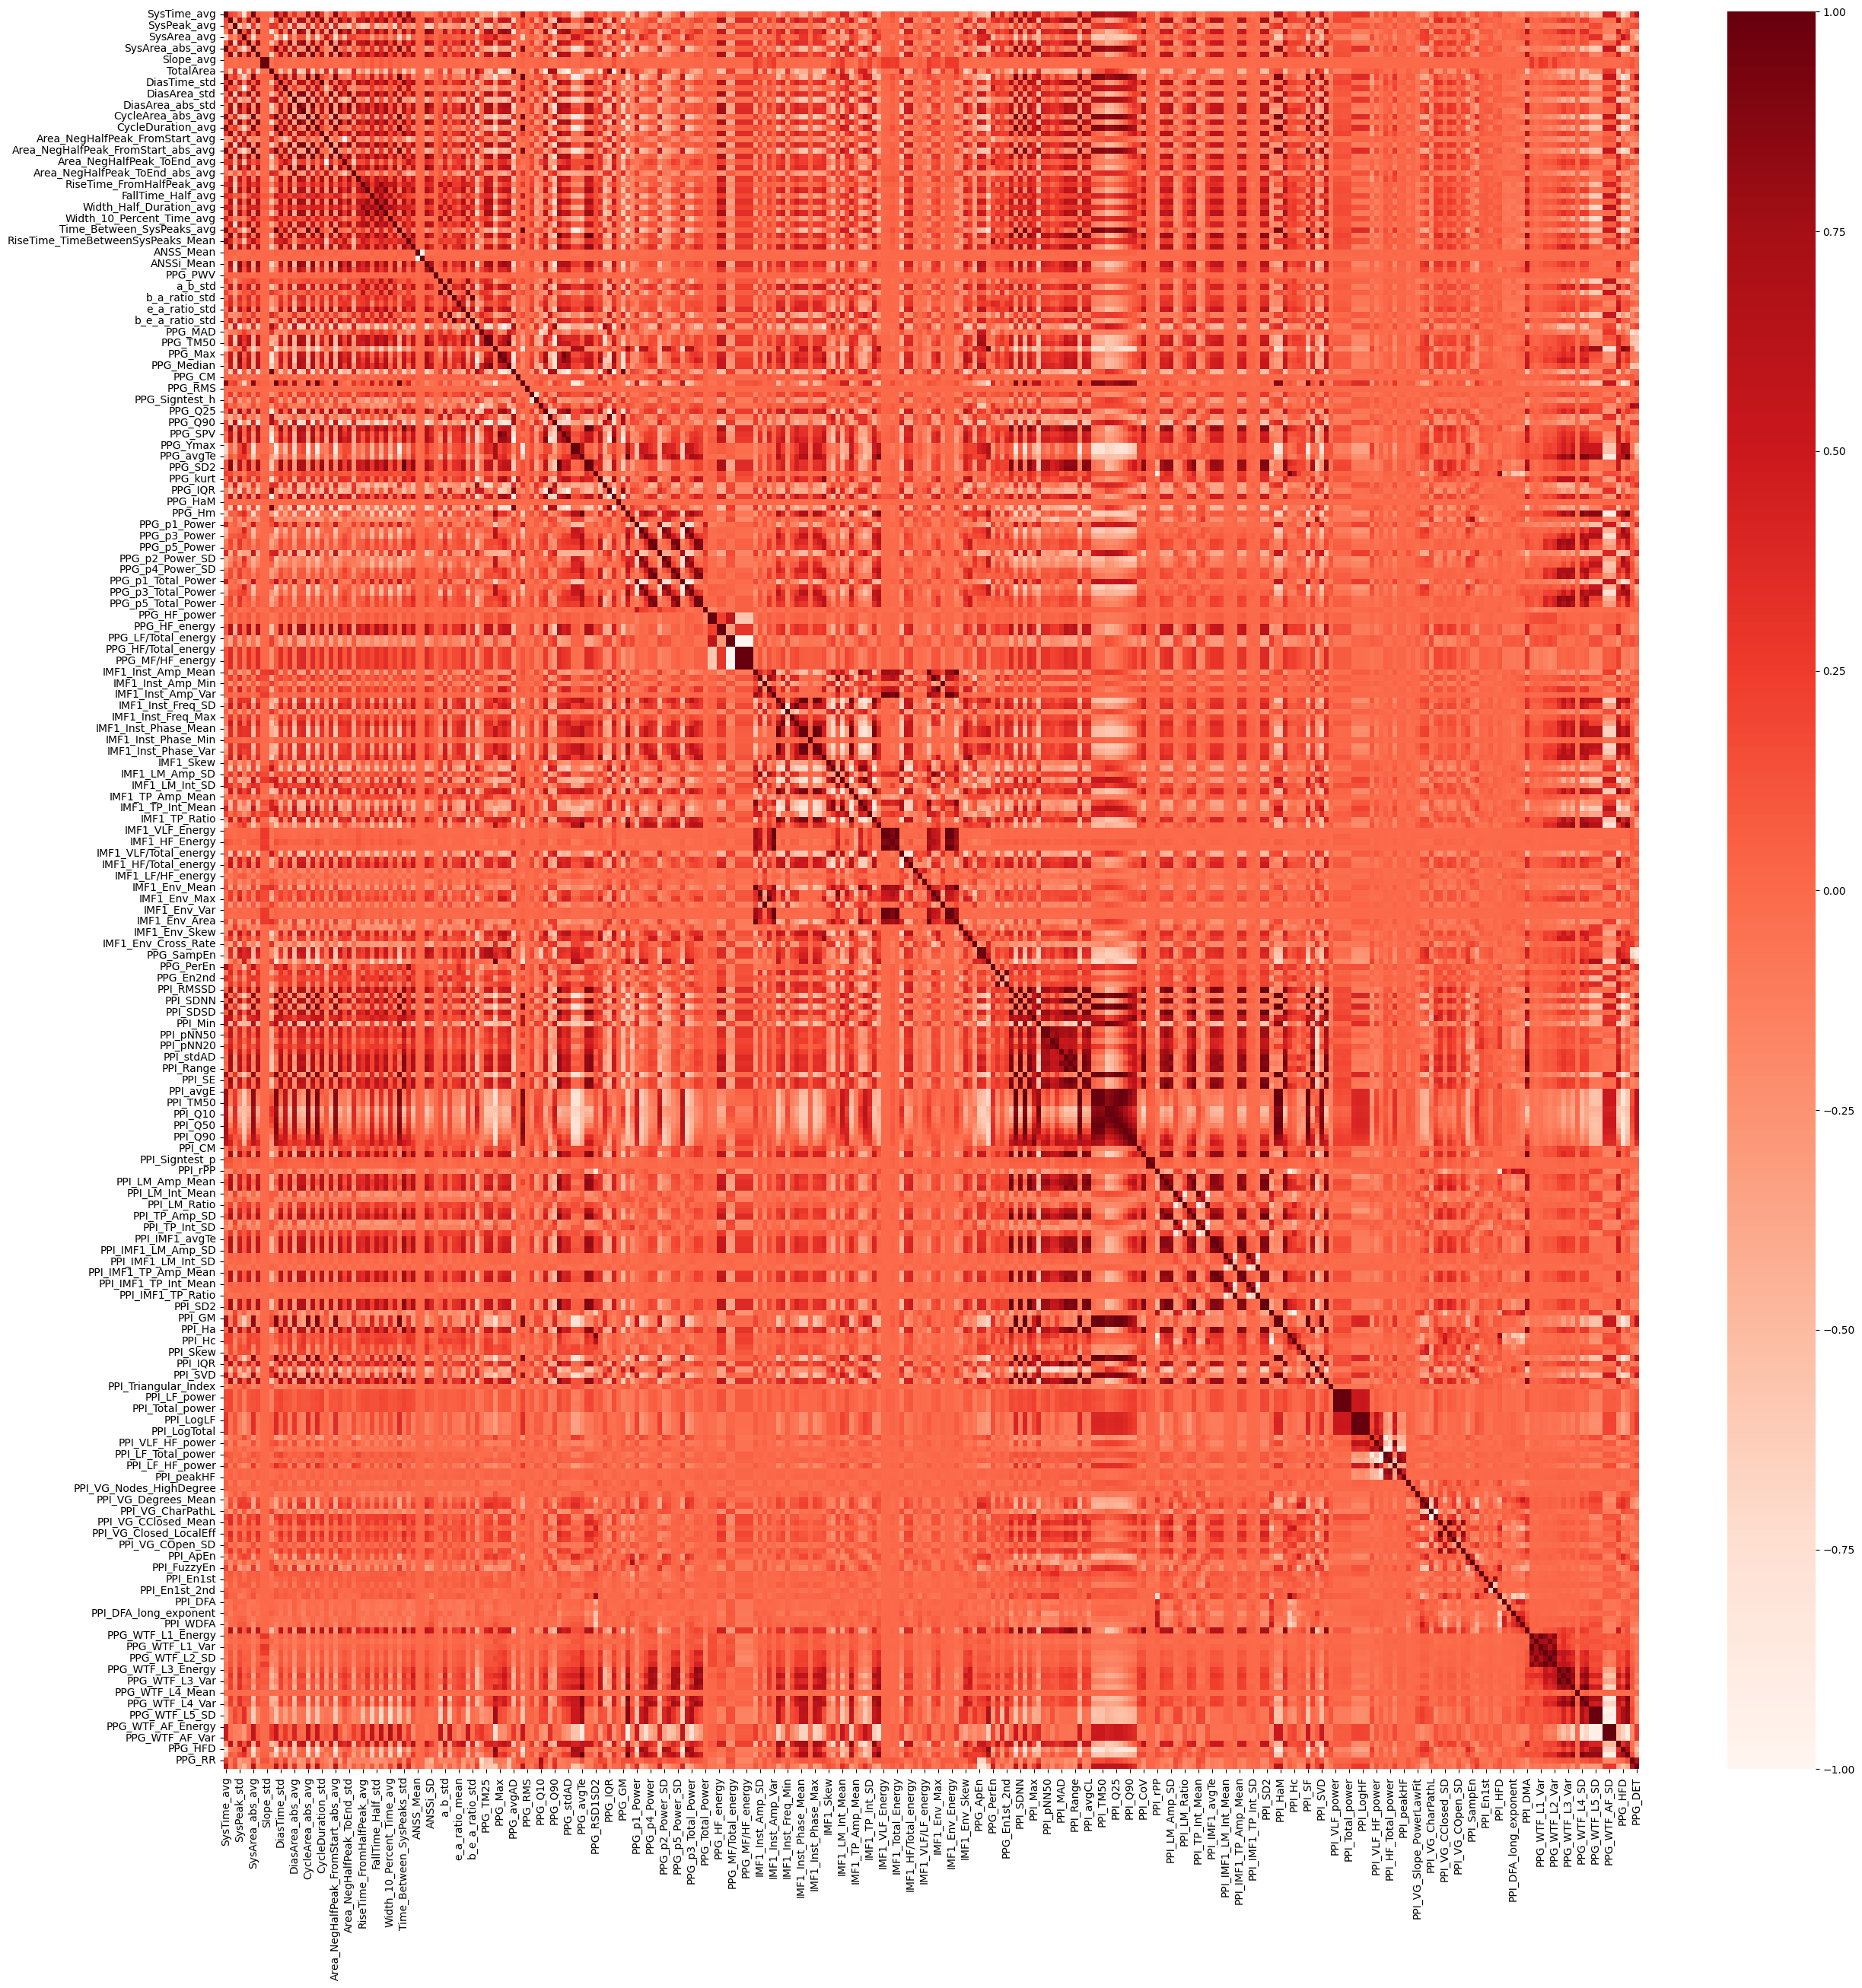

In [3]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [4]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [5]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [6]:
# Check NaNs

nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_peakVLF', 'PPI_peakHF', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 

In [7]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


# Prepare X and y

In [8]:
# Load subjects
df_subjects = pd.read_csv("/Users/kmarkov/Documents/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['5_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['5_stages']
groups = df_revised['SubjectID']


# Balance the dataset

In [20]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

def resample_within_groups(X, y, groups, max_k_neighbors=5):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]
        
        # Impute missing values
        X_g = imputer.fit_transform(X_g)
        
        # Determine the number of neighbors based on the smallest class count
        # Ensure each class has at least 2 samples for resampling
        class_counts = np.bincount(y_g.astype(int))
        min_class_count = np.min(class_counts[class_counts > 0])  # Only consider classes with more than 0 samples
        
        if min_class_count > 1:
            k_neighbors = min(min_class_count - 1, max_k_neighbors)  # Adjust k_neighbors to be less than the number of samples
            smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
            X_resampled_g, y_resampled_g = smote.fit_resample(X_g, y_g)
            # Append the resampled data
            resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))  # Convert back to DataFrame to maintain feature names
            resampled_y.append(pd.Series(y_resampled_g))  # Convert back to Series
            resampled_groups.extend([group] * len(y_resampled_g))  # Extend the groups array with the current group repeated for the resampled size
        else:
            print(f"Not enough samples in group {group} to resample. Minimum required is 2, got {min_class_count}.")

    if resampled_X:  # Check if there's any data resampled
        return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)
    else:
        return None, None, None

# Usage of the function with sample data
# Assume X, y, and groups are already defined and appropriately prepared
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)

if X_resampled is not None:
    print("Resampling successful!")
else:
    print("No data was resampled.")


Resampling successful!


In [21]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

0    35648
1    35648
2    35648
3    35648
4    35648
Name: 5_stages, dtype: int64


# Feature Selection

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X_resampled, y_resampled)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X_resampled.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysArea_avg',
       'SysArea_std', 'SysArea_abs_avg', 'Slope_avg', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg',
       ...
       'PPI_FuzzyEn', 'PPI_HFD', 'PPI_WDFA', 'PPG_WTF_L4_Energy',
       'PPG_WTF_L4_SD', 'PPG_WTF_L5_Energy', 'PPG_LC', 'PPG_HFD', 'PPG_RR',
       'PPG_DET'],
      dtype='object', length=102)


In [23]:
X_selected = X_resampled[selected_features]
X_selected

,SysTime_avg,SysTime_std,SysPeak_avg,SysArea_avg,SysArea_std,SysArea_abs_avg,Slope_avg,TotalArea,DiasTime_avg,DiasArea_avg,...,PPI_FuzzyEn,PPI_HFD,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0.243075,0.106977,2.051287,-1.285312,14.791261,0.190149,0.129524,20.185956,0.665483,1.261417,...,0.782374,1.840314,1.041127,73.786172,0.544357,469.265490,56.679685,1.596500,0.103262,0.916861
1,0.343277,0.225440,1.927268,2.661957,17.248446,0.190526,0.250397,18.963432,0.897964,-2.347344,...,0.942035,1.670130,1.191702,124.451367,0.706797,986.855721,59.669821,1.481480,0.100278,0.961463
2,0.274200,0.101530,2.242864,0.956881,15.603188,0.206661,0.152634,22.063562,0.709604,-0.729983,...,1.311633,1.935544,0.566286,47.301892,0.435842,452.286898,61.623213,1.512300,0.070013,0.889709
3,0.437240,0.398992,2.824896,-1.905432,15.568619,0.304404,0.299215,21.087311,0.984896,2.499454,...,1.408809,1.842306,0.691065,357.419869,1.197743,748.970794,62.408353,1.531390,0.075477,0.864056
4,0.274282,0.135000,2.913433,1.484555,19.700900,0.274228,0.094563,25.268359,0.757390,-1.118548,...,1.165285,1.902181,1.272573,51.561563,0.455048,495.221854,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178235,0.335973,0.113746,2.829966,7.081096,6.819403,0.337329,0.116838,25.289760,0.981725,-6.372480,...,2.149415,2.043310,0.729236,26.352558,0.325106,429.386192,54.189808,1.385571,0.082261,0.922234
178236,0.410867,0.148499,2.865707,4.421904,6.374723,0.401758,0.140578,25.475832,1.042145,-3.330848,...,2.023384,2.046786,0.587529,14.584978,0.242009,236.988272,51.644883,1.341711,0.077505,0.929447
178237,0.381718,0.117173,2.820353,4.224794,7.387027,0.381172,0.134264,25.448341,1.014432,-5.133294,...,1.719068,2.058957,0.370365,18.398550,0.271823,282.489098,51.318011,1.357939,0.078935,0.926154
178238,0.410689,0.138113,2.819470,3.731708,6.797228,0.401082,0.142770,25.254315,1.066085,-4.107774,...,2.206285,2.021476,0.640667,15.383842,0.248537,253.248749,50.170346,1.323473,0.082197,0.938032


In [51]:
for column in X_selected.columns:
    print(column)

SysTime_avg
SysTime_std
SysPeak_avg
SysArea_avg
SysArea_std
SysArea_abs_avg
Slope_avg
TotalArea
DiasTime_avg
DiasArea_avg
DiasArea_std
DiasArea_abs_avg
CycleArea_std
Area_NegHalfPeak_FromStart_avg
Area_NegHalfPeak_ToEnd_avg
Area_NegHalfPeak_ToEnd_abs_avg
RiseTime_FromHalfPeak_avg
RiseTime_FromHalfPeak_std
FallTime_Half_avg
FallTime_Half_std
Width_Half_Duration_avg
Width_Half_Duration_std
Width_10_Percent_Time_avg
Width_10_Percent_Time_std
RiseTime_TimeBetweenSysPeaks_Mean
RiseTime_TimeBetweenSysPeaks_SD
ANSS_Mean
a_b_mean
a_b_std
b_a_ratio_mean
b_a_ratio_std
e_a_ratio_mean
e_a_ratio_std
b_e_a_ratio_mean
PPG_Min
PPG_MAD
PPG_TM25
PPG_TM50
PPG_avgCL
PPG_Median
PPG_CM
PPG_Q10
PPG_Q25
PPG_Q75
PPG_Q90
PPG_SDSD
PPG_stdAD
PPG_avgTe
PPG_RSD1SD2
PPG_kurt
PPG_skew
PPG_IQR
PPG_SF
PPG_GM
PPG_p3_Power
PPG_p4_Power
PPG_p3_Power_SD
PPG_p4_Power_SD
PPG_p1_Total_Power
PPG_p2_Total_Power
PPG_p3_Total_Power
PPG_p4_Total_Power
IMF1_Inst_Amp_Mean
IMF1_Inst_Freq_Mean
IMF1_Kurt
IMF1_TP_Amp_SD
IMF1_TP_Int_Mean

# Hyperparameter tuning

In [24]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 7, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 413}
Best score:  0.1215414768170628


In [25]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Define the parameter grid based on the results of random search
param_grid_rf = {
    'classifier__bootstrap': [False, True],
    'classifier__max_depth': [7, 8],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [4,5, 6],
    'classifier__min_samples_split': [2, 4],
    'classifier__n_estimators': [200, 413, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y_resampled, groups=groups_resampled),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y_resampled)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best score:  0.11294387298407889


# Train Models

## 5-fold CV

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=8,
    max_features='sqrt',
    min_samples_leaf=6,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 5 for a 5-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)


Test set distribution: 0    6990
1    6990
2    6990
3    6990
4    6990
Name: 5_stages, dtype: int64
Test set distribution: 0    7186
1    7186
2    7186
3    7186
4    7186
Name: 5_stages, dtype: int64
Test set distribution: 0    7145
1    7145
2    7145
3    7145
4    7145
Name: 5_stages, dtype: int64
Test set distribution: 0    7159
1    7159
2    7159
3    7159
4    7159
Name: 5_stages, dtype: int64
Test set distribution: 0    7168
1    7168
2    7168
3    7168
4    7168
Name: 5_stages, dtype: int64
Accuracy       0.294209
Sensitivity    0.294209
Specificity    0.823552
Precision      0.294209
F1 Score       0.294209
MCC            0.119023
dtype: float64
Accuracy       0.032483
Sensitivity    0.032483
Specificity    0.008121
Precision      0.032483
F1 Score       0.032483
MCC            0.041068
dtype: float64
Final Confusion Matrix:
 [[14672  6319  2795  3647  8215]
 [ 8503  9377  4009  5272  8487]
 [ 6301  6167  5955  7191 10034]
 [ 5855  6736  5776  8894  8387]
 [ 5879  6519  

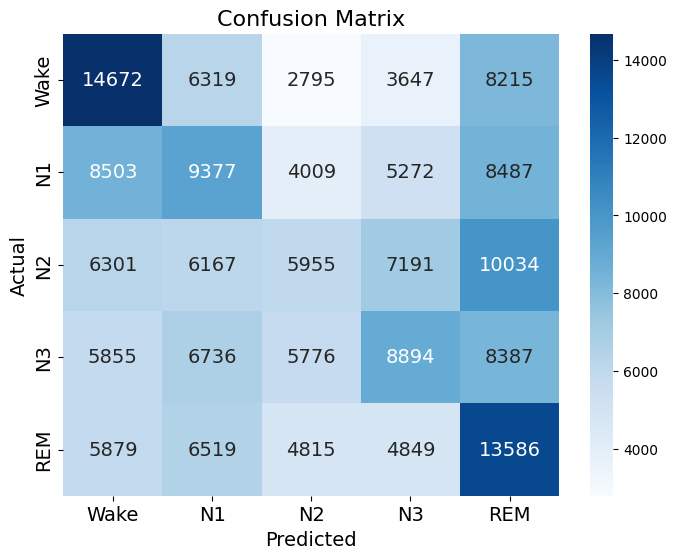

In [27]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Define the number of classes
n_classes = 5

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [29]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv5 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2],
    'Class 3 Importances': average_importances[3],
    'Class 4 Importances': average_importances[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv5['Overall Importance (Mean)'] = importances_df_cv5[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv5

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Class 4 Importances,Overall Importance (Mean)
0,SysTime_avg,0.005939,0.007835,0.008153,0.014236,0.012099,0.009652
1,SysTime_std,0.007505,0.007231,0.003351,0.009985,0.006333,0.006881
2,SysPeak_avg,0.009082,0.007530,0.005250,0.008951,0.006966,0.007556
3,SysArea_avg,0.006357,0.012020,0.007371,0.013885,0.016447,0.011216
4,SysArea_std,0.010818,0.009090,0.003792,0.005431,0.003298,0.006486
...,...,...,...,...,...,...,...
97,PPG_WTF_L5_Energy,0.004438,0.006020,0.004474,0.005680,0.006140,0.005350
98,PPG_LC,0.029885,0.006345,0.008707,0.007123,0.020841,0.014580
99,PPG_HFD,0.010589,0.009887,0.008563,0.010364,0.008573,0.009595
100,PPG_RR,0.004933,0.011274,0.006428,0.009380,0.010418,0.008487


# 10-fold CV

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)


Test set distribution: 0    3606
1    3606
2    3606
3    3606
4    3606
Name: 5_stages, dtype: int64
Test set distribution: 0    3557
1    3557
2    3557
3    3557
4    3557
Name: 5_stages, dtype: int64
Test set distribution: 0    3695
1    3695
2    3695
3    3695
4    3695
Name: 5_stages, dtype: int64
Test set distribution: 0    3442
1    3442
2    3442
3    3442
4    3442
Name: 5_stages, dtype: int64
Test set distribution: 0    3671
1    3671
2    3671
3    3671
4    3671
Name: 5_stages, dtype: int64
Test set distribution: 0    3442
1    3442
2    3442
3    3442
4    3442
Name: 5_stages, dtype: int64
Test set distribution: 0    3691
1    3691
2    3691
3    3691
4    3691
Name: 5_stages, dtype: int64
Test set distribution: 0    3658
1    3658
2    3658
3    3658
4    3658
Name: 5_stages, dtype: int64
Test set distribution: 0    3444
1    3444
2    3444
4    3444
3    3444
Name: 5_stages, dtype: int64
Test set distribution: 0    3442
1    3442
4    3442
2    3442
3    3442
Name: 5_s

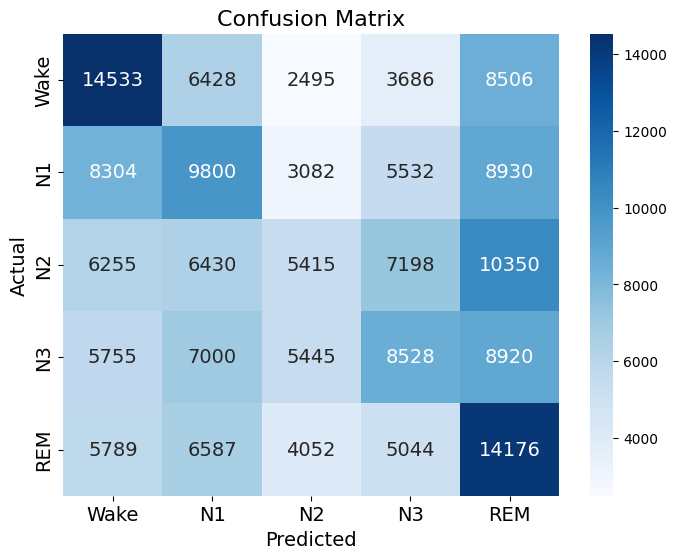

In [31]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Define the number of classes
n_classes = 5

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv10 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [33]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv10 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv10[0],
    'Class 1 Importances': average_importances_cv10[1],
    'Class 2 Importances': average_importances_cv10[2],
    'Class 3 Importances': average_importances_cv10[3],
    'Class 4 Importances': average_importances[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv10['Overall Importance (Mean)'] = importances_df_cv10[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv10

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Class 4 Importances,Overall Importance (Mean)
0,SysTime_avg,0.005859,0.007445,0.007808,0.013628,0.012099,0.009368
1,SysTime_std,0.007949,0.007504,0.003273,0.009568,0.006333,0.006925
2,SysPeak_avg,0.008818,0.007872,0.005144,0.008831,0.006966,0.007526
3,SysArea_avg,0.006132,0.010726,0.007288,0.014578,0.016447,0.011034
4,SysArea_std,0.009977,0.009858,0.003799,0.004890,0.003298,0.006364
...,...,...,...,...,...,...,...
97,PPG_WTF_L5_Energy,0.004161,0.006438,0.004137,0.005502,0.006140,0.005275
98,PPG_LC,0.032110,0.006355,0.009946,0.006424,0.020841,0.015135
99,PPG_HFD,0.010519,0.008934,0.008526,0.009768,0.008573,0.009264
100,PPG_RR,0.004563,0.013046,0.006295,0.009181,0.010418,0.008701


# 20-fold CV

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)


Test set distribution: 0    1969
1    1969
2    1969
3    1969
4    1969
Name: 5_stages, dtype: int64
Test set distribution: 0    1909
1    1909
2    1909
3    1909
4    1909
Name: 5_stages, dtype: int64
Test set distribution: 0    1754
1    1754
2    1754
3    1754
4    1754
Name: 5_stages, dtype: int64
Test set distribution: 0    1748
1    1748
2    1748
3    1748
4    1748
Name: 5_stages, dtype: int64
Test set distribution: 0    1719
1    1719
2    1719
3    1719
4    1719
Name: 5_stages, dtype: int64
Test set distribution: 0    1718
1    1718
2    1718
3    1718
4    1718
Name: 5_stages, dtype: int64
Test set distribution: 0    1705
1    1705
2    1705
3    1705
4    1705
Name: 5_stages, dtype: int64
Test set distribution: 0    1704
1    1704
2    1704
3    1704
4    1704
Name: 5_stages, dtype: int64
Test set distribution: 0    1701
1    1701
2    1701
3    1701
4    1701
Name: 5_stages, dtype: int64
Test set distribution: 0    1962
1    1962
2    1962
3    1962
4    1962
Name: 5_s

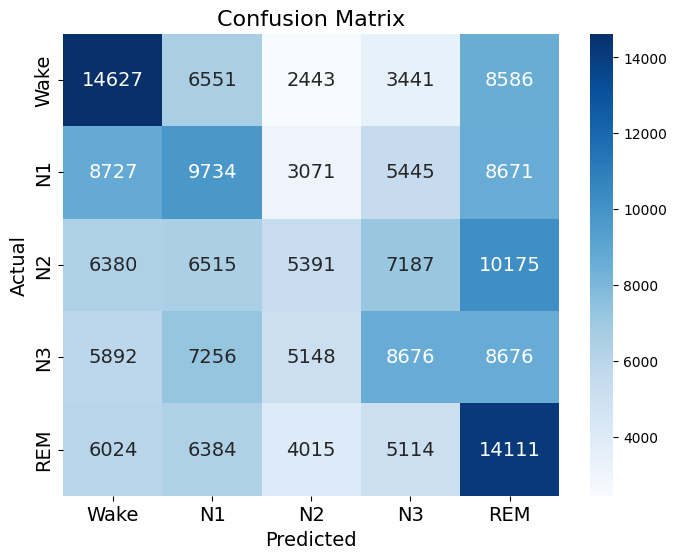

In [35]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv20 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [37]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv20 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv20[0],
    'Class 1 Importances': average_importances_cv20[1],
    'Class 2 Importances': average_importances_cv20[2],
    'Class 3 Importances': average_importances_cv20[3],
    'Class 4 Importances': average_importances_cv20[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv20['Overall Importance (Mean)'] = importances_df_cv20[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv20

importances_df_cv20.to_csv('importances_df_cv20_5_stages.csv')


# Feature Importances

In [38]:
# Assuming importances_df_cv10, importances_df_cv5, importances_df_cv20 are already defined
# Step 1: Merge the dataframes on the 'Feature' column
merged_df = pd.merge(importances_df_cv10, importances_df_cv5, on='Feature', suffixes=('_cv10', '_cv5'))
merged_df = pd.merge(merged_df, importances_df_cv20, on='Feature')

# Step 2: Calculate the average importance for each class across the three validation methods
merged_df['Class 0 Average'] = merged_df[['Class 0 Importances_cv10', 'Class 0 Importances_cv5', 'Class 0 Importances']].mean(axis=1)
merged_df['Class 1 Average'] = merged_df[['Class 1 Importances_cv10', 'Class 1 Importances_cv5', 'Class 1 Importances']].mean(axis=1)
merged_df['Class 2 Average'] = merged_df[['Class 2 Importances_cv10', 'Class 2 Importances_cv5', 'Class 2 Importances']].mean(axis=1)
merged_df['Class 3 Average'] = merged_df[['Class 3 Importances_cv10', 'Class 3 Importances_cv5', 'Class 3 Importances']].mean(axis=1)
merged_df['Class 4 Average'] = merged_df[['Class 4 Importances_cv10', 'Class 4 Importances_cv5', 'Class 4 Importances']].mean(axis=1)


# Step 3: Calculate the overall mean importance from the averages of each class
merged_df['Overall Importance (Mean)'] = merged_df[['Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average', 'Class 4 Average']].mean(axis=1)

# Optionally, create a DataFrame to view or export just the features and their importances
final_df = merged_df[['Feature', 'Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average', 'Class 4 Average', 'Overall Importance (Mean)']]
final_df

,Feature,Class 0 Average,Class 1 Average,Class 2 Average,Class 3 Average,Class 4 Average,Overall Importance (Mean)
0,SysTime_avg,0.005917,0.007497,0.007909,0.013867,0.012462,0.009530
1,SysTime_std,0.007793,0.007443,0.003333,0.009718,0.006636,0.006984
2,SysPeak_avg,0.008796,0.007704,0.005150,0.008934,0.006907,0.007498
3,SysArea_avg,0.006188,0.011217,0.007302,0.014232,0.016359,0.011059
4,SysArea_std,0.010334,0.009383,0.003759,0.005163,0.003141,0.006356
...,...,...,...,...,...,...,...
97,PPG_WTF_L5_Energy,0.004310,0.006277,0.004146,0.005632,0.006091,0.005291
98,PPG_LC,0.031303,0.006302,0.009395,0.006725,0.021124,0.014970
99,PPG_HFD,0.010442,0.009235,0.008469,0.009920,0.008308,0.009275
100,PPG_RR,0.004691,0.012453,0.006229,0.009506,0.010833,0.008742


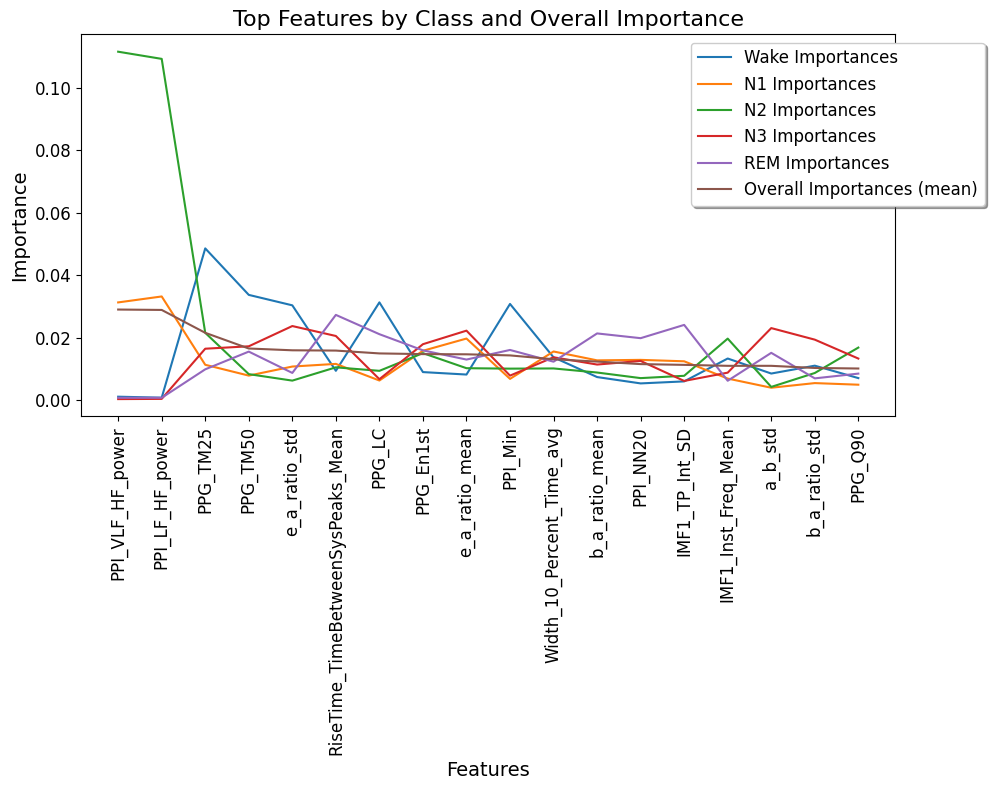

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 for each class
top_class_0 = final_df.nlargest(5, 'Class 0 Average')['Feature']
top_class_1 = final_df.nlargest(5, 'Class 1 Average')['Feature']
top_class_2 = final_df.nlargest(5, 'Class 2 Average')['Feature']
top_class_3 = final_df.nlargest(5, 'Class 3 Average')['Feature']
top_class_4 = final_df.nlargest(5, 'Class 4 Average')['Feature']
top_overall = final_df.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_class_3, top_class_4, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = final_df[final_df['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Average' else label for label in labels]
new_labels = ['N1 Importances' if label == 'Class 1 Average' else label for label in new_labels]
new_labels = ['N2 Importances' if label == 'Class 2 Average' else label for label in new_labels]
new_labels = ['N3 Importances' if label == 'Class 3 Average' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 4 Average' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()


In [40]:
# Select the top 5 features for each class and overall
top_features_class_0 = final_df.nlargest(5, 'Class 0 Average')
top_features_class_1 = final_df.nlargest(5, 'Class 1 Average')
top_features_class_2 = final_df.nlargest(5, 'Class 2 Average')
top_features_class_3 = final_df.nlargest(5, 'Class 3 Average')
top_features_class_4 = final_df.nlargest(5, 'Class 4 Average')
top_features_overall = final_df.nlargest(5, 'Overall Importance (Mean)')

# Reset index to get the feature names in a column (if they are set as the index)
top_features_class_0 = top_features_class_0.reset_index()
top_features_class_1 = top_features_class_1.reset_index()
top_features_class_2 = top_features_class_2.reset_index()
top_features_class_3 = top_features_class_3.reset_index()
top_features_class_4 = top_features_class_4.reset_index()
top_features_overall = top_features_overall.reset_index()

# Combine the DataFrames and melt for plotting
top_features_combined = pd.concat([
    top_features_class_0.assign(Class='Wake').melt(id_vars=['Feature', 'Class'], value_vars=['Class 0 Average'], value_name='Importance'),
    top_features_class_1.assign(Class='N1').melt(id_vars=['Feature', 'Class'], value_vars=['Class 1 Average'], value_name='Importance'),
    top_features_class_2.assign(Class='N2').melt(id_vars=['Feature', 'Class'], value_vars=['Class 2 Average'], value_name='Importance'),
    top_features_class_3.assign(Class='N3').melt(id_vars=['Feature', 'Class'], value_vars=['Class 3 Average'], value_name='Importance'),
    top_features_class_4.assign(Class='REM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 4 Average'], value_name='Importance'),
    top_features_overall.assign(Class='Overall').melt(id_vars=['Feature', 'Class'], value_vars=['Overall Importance (Mean)'], value_name='Importance')
])


# Map overall importance to each feature
overall_importance_map = top_features_overall.set_index('Feature')['Overall Importance (Mean)'].to_dict()
top_features_combined['Overall Importance (Mean)'] = top_features_combined['Feature'].map(overall_importance_map)

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order
top_features_combined_sorted = top_features_combined.sort_values(by='Overall Importance (Mean)', ascending=False)

# Print sorted DataFrame
top_features_combined_sorted



,Feature,Class,variable,Importance,Overall Importance (Mean)
1,PPI_VLF_HF_power,N1,Class 1 Average,0.031290,0.029010
0,PPI_VLF_HF_power,N2,Class 2 Average,0.111513,0.029010
0,PPI_VLF_HF_power,Overall,Overall Importance (Mean),0.029010,0.029010
0,PPI_LF_HF_power,N1,Class 1 Average,0.033194,0.028883
1,PPI_LF_HF_power,N2,Class 2 Average,0.109218,0.028883
1,PPI_LF_HF_power,Overall,Overall Importance (Mean),0.028883,0.028883
0,PPG_TM25,Wake,Class 0 Average,0.048576,0.021565
2,PPG_TM25,N2,Class 2 Average,0.021558,0.021565
2,PPG_TM25,Overall,Overall Importance (Mean),0.021565,0.021565
1,PPG_TM50,Wake,Class 0 Average,0.033700,0.016542


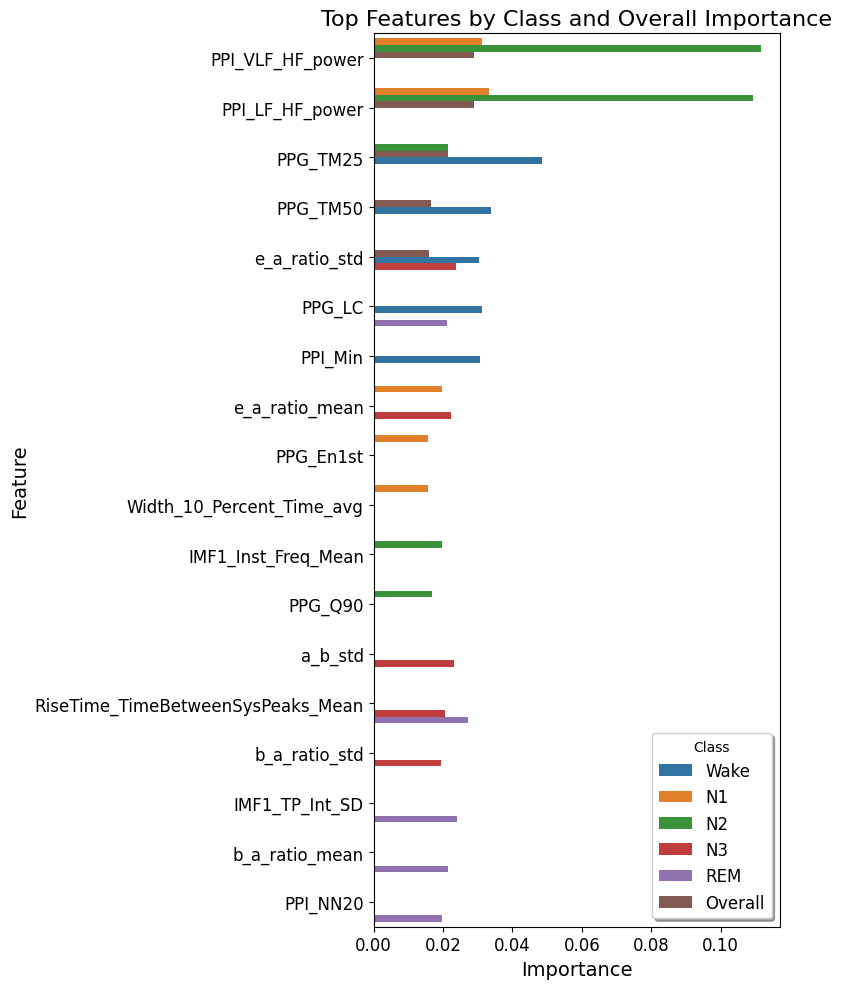

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with the combined DataFrame
# Define the custom palette using seaborn's "deep" palette
deep_palette = sns.color_palette()
custom_palette = {
    'Wake': deep_palette[0],  # Blue
    'N1': deep_palette[1],  # Orange
    'N2': deep_palette[2],  # Green
    'N3': deep_palette[3],  # Green
    'REM': deep_palette[4],  # Red
    'Overall': deep_palette[5]  # Purple
}

plt.figure(figsize=(8, 10))
barplot = sns.barplot(
    data=top_features_combined_sorted,
    x='Importance',
    y='Feature',
    hue='Class',
    palette=custom_palette
)
# Improve the aesthetics and legibility of the plot
plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend to match the desired order and colors
handles, labels = barplot.get_legend_handles_labels()
desired_order = ['Wake', 'N1', 'N2', 'N3', 'REM', 'Overall']
ordered_handles = [handles[labels.index(lbl)] for lbl in desired_order]

# Create a new legend with the desired order and colors
plt.legend(ordered_handles, desired_order, title='Class', fontsize=12, frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

In [42]:
feature_names = top_features_combined_sorted['Feature'].unique()

In [43]:
feature_names

array(['PPI_VLF_HF_power', 'PPI_LF_HF_power', 'PPG_TM25', 'PPG_TM50',
       'e_a_ratio_std', 'PPG_LC', 'PPI_Min', 'e_a_ratio_mean',
       'PPG_En1st', 'Width_10_Percent_Time_avg', 'IMF1_Inst_Freq_Mean',
       'PPG_Q90', 'a_b_std', 'RiseTime_TimeBetweenSysPeaks_Mean',
       'b_a_ratio_std', 'IMF1_TP_Int_SD', 'b_a_ratio_mean', 'PPI_NN20'],
      dtype=object)

In [44]:
top_features = X_resampled[feature_names]

C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_25092\2613695228.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = y_resampled  # Add the class labels


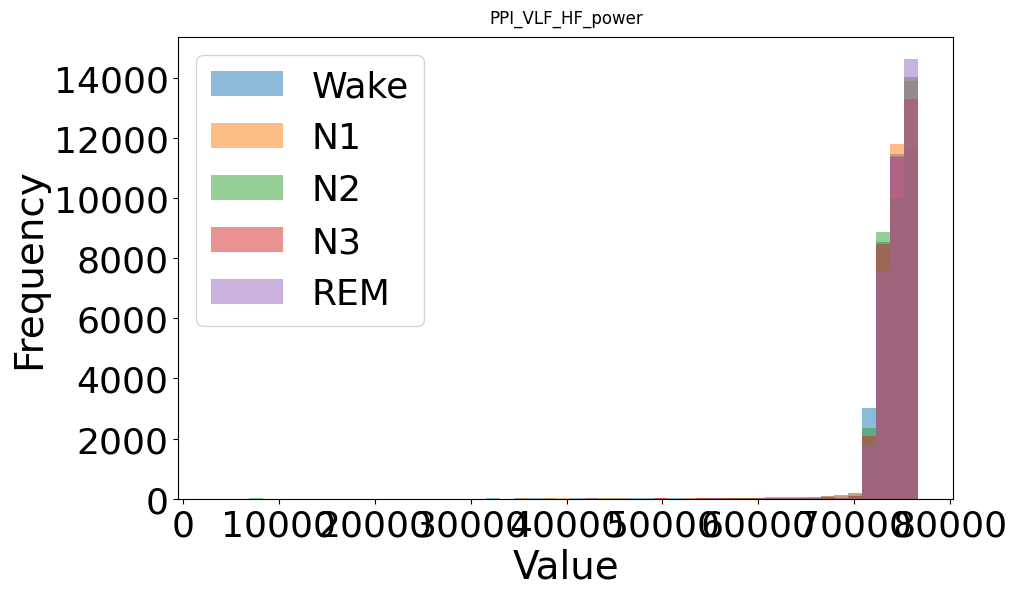

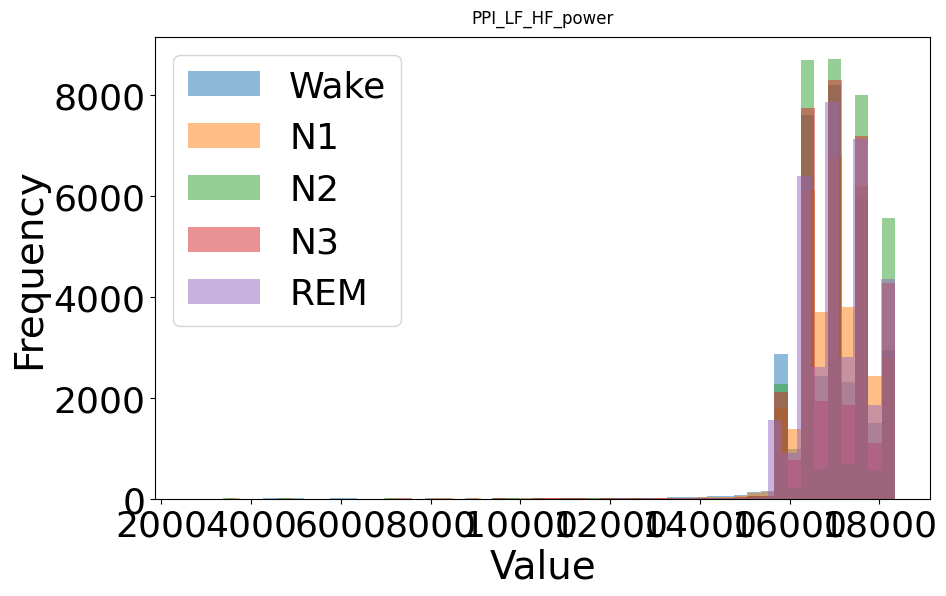

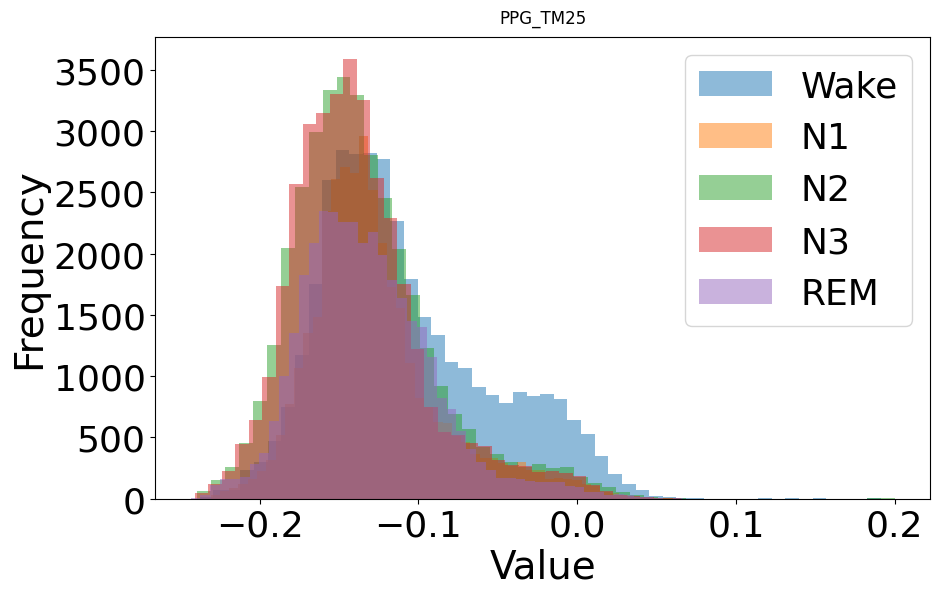

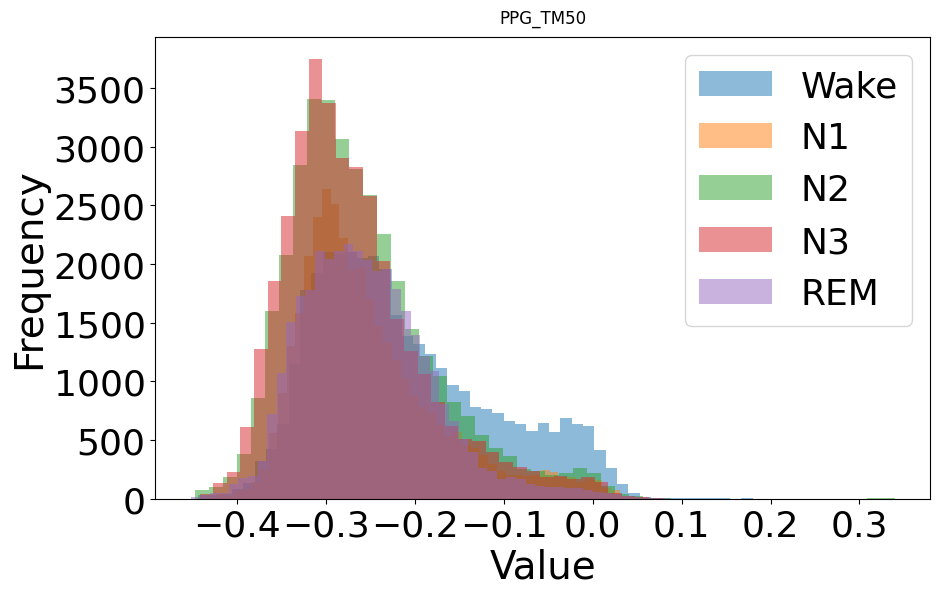

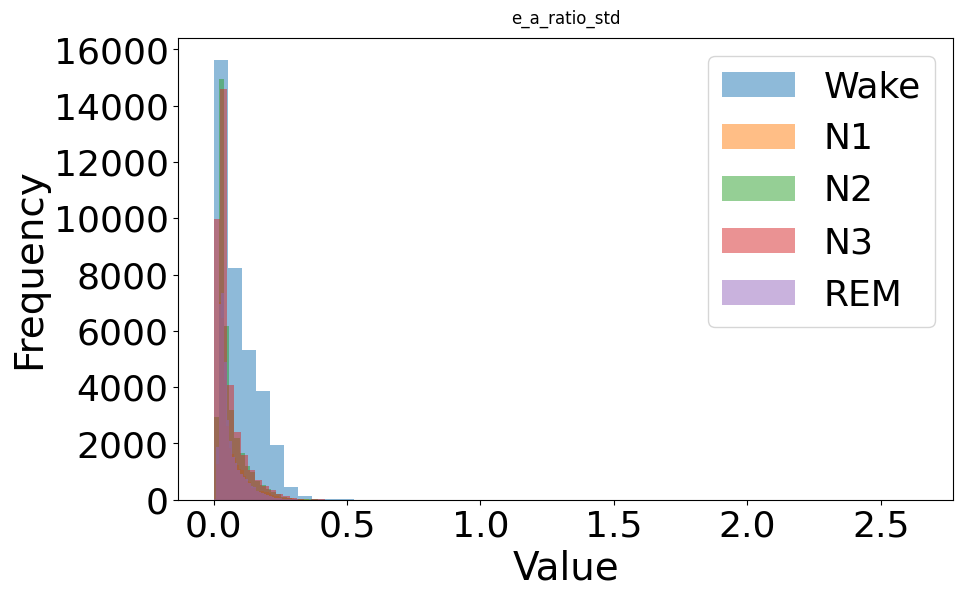

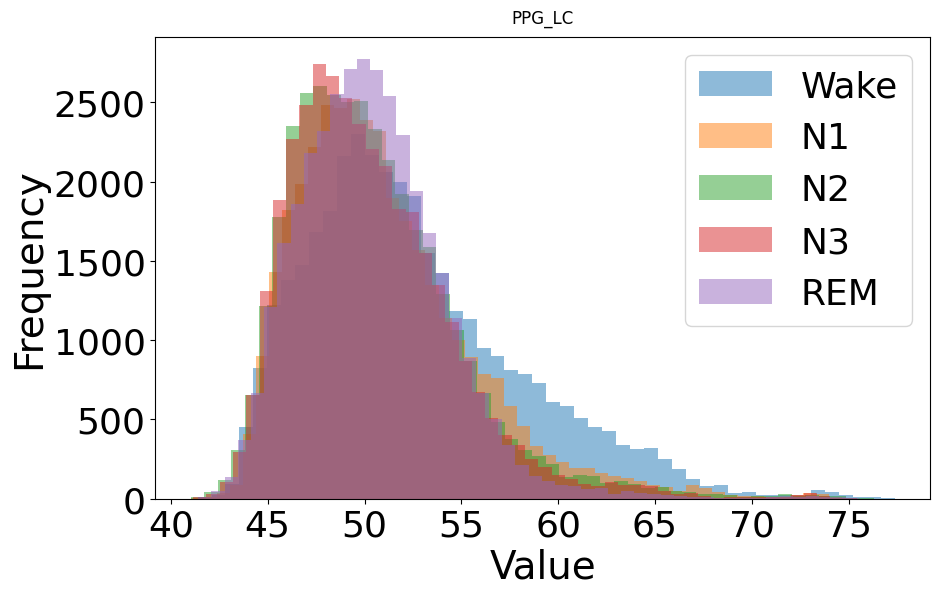

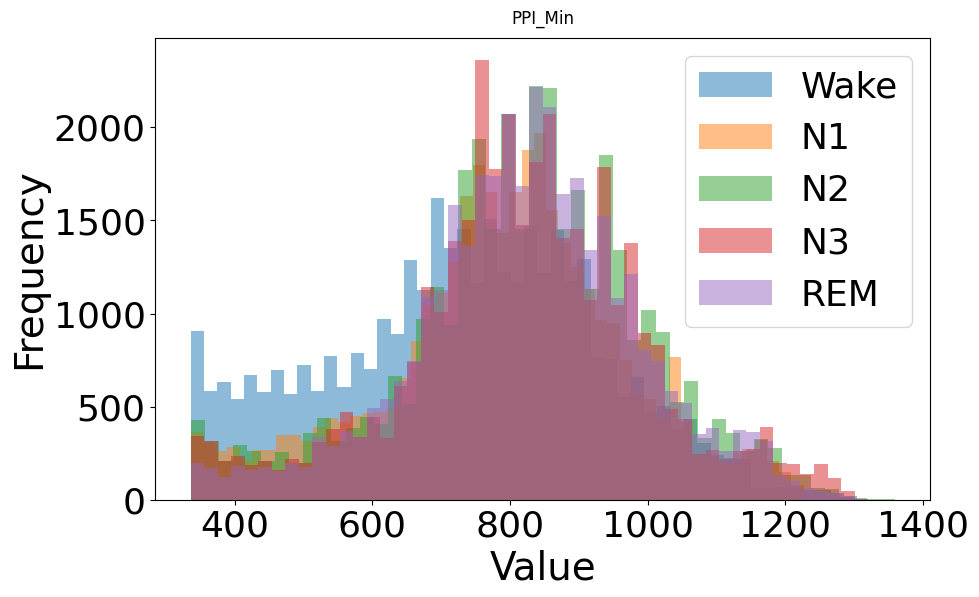

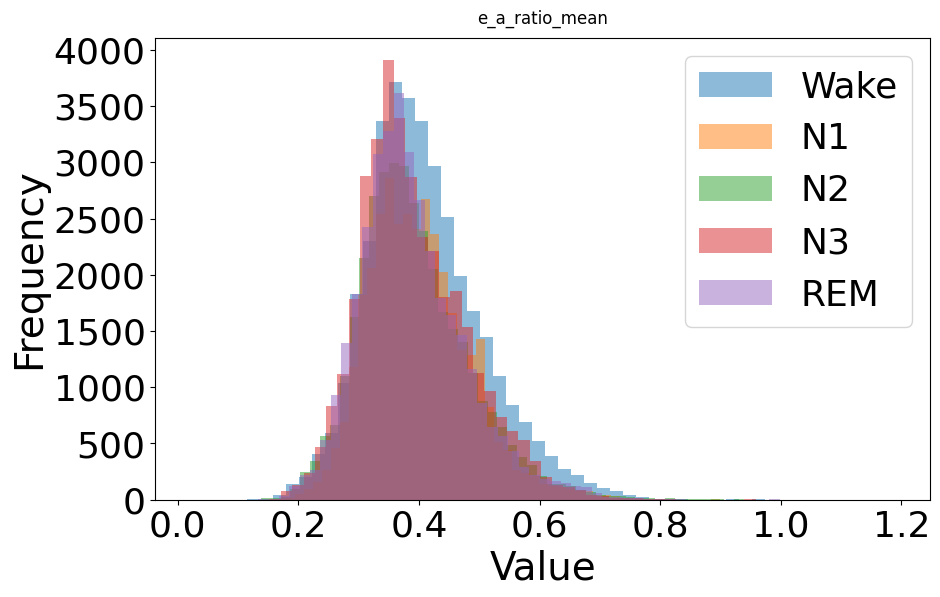

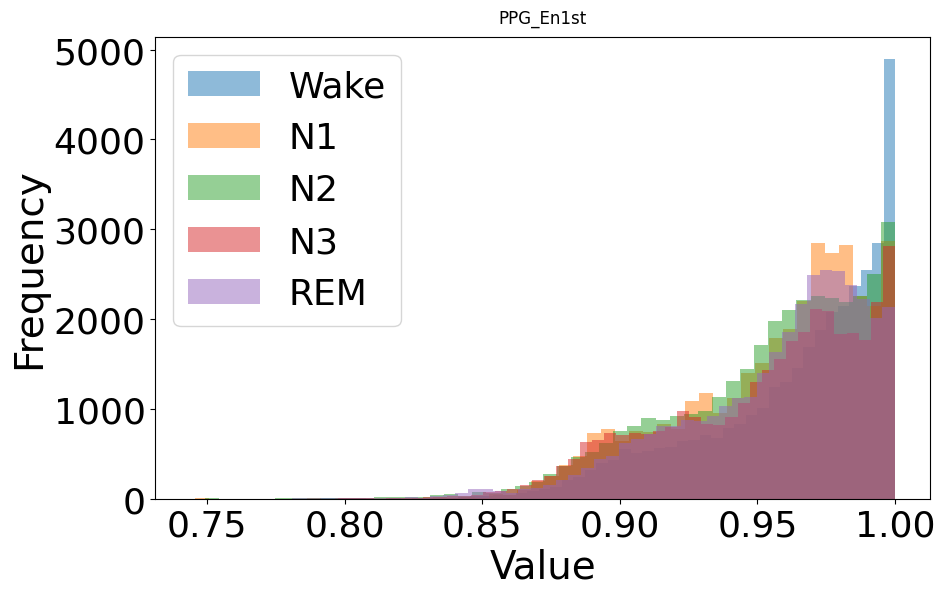

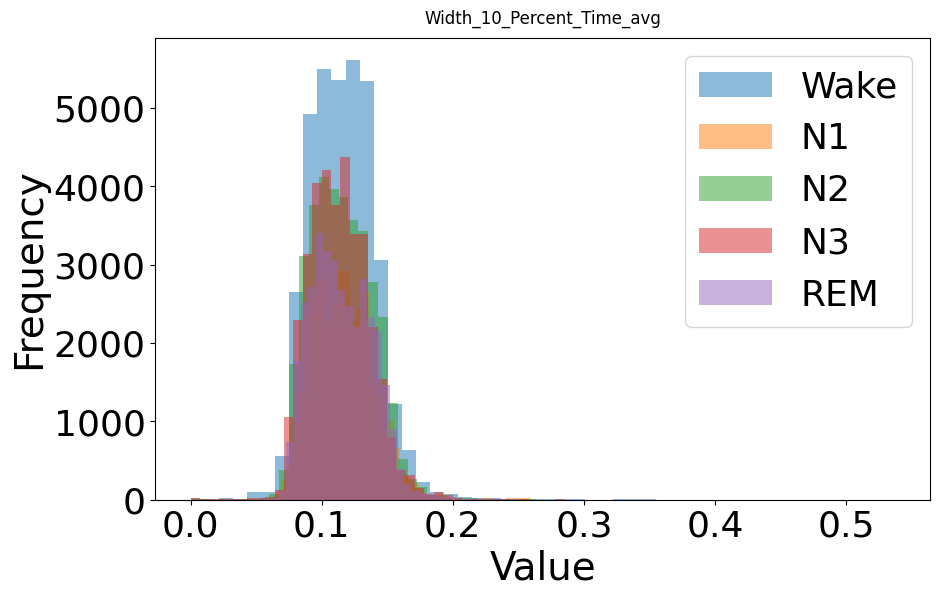

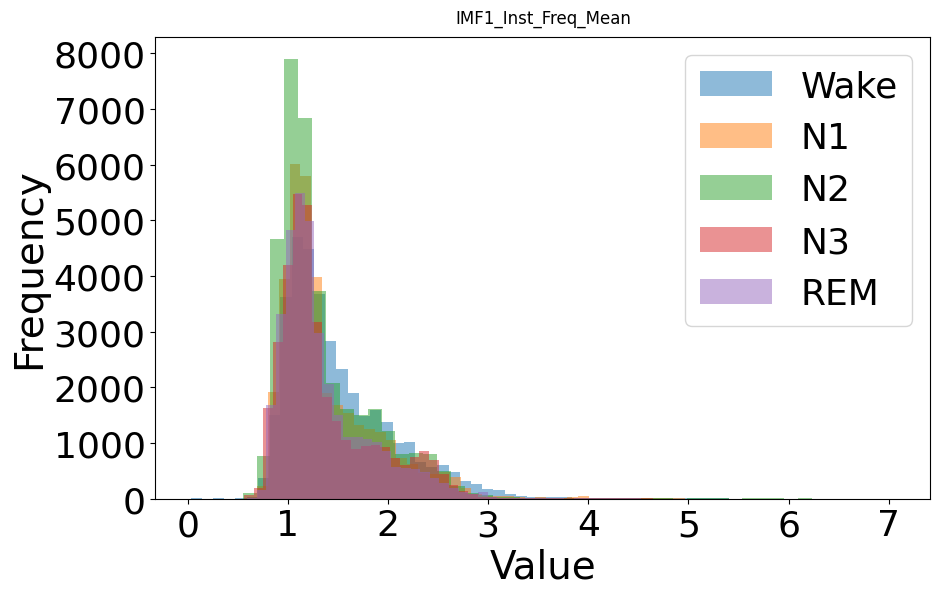

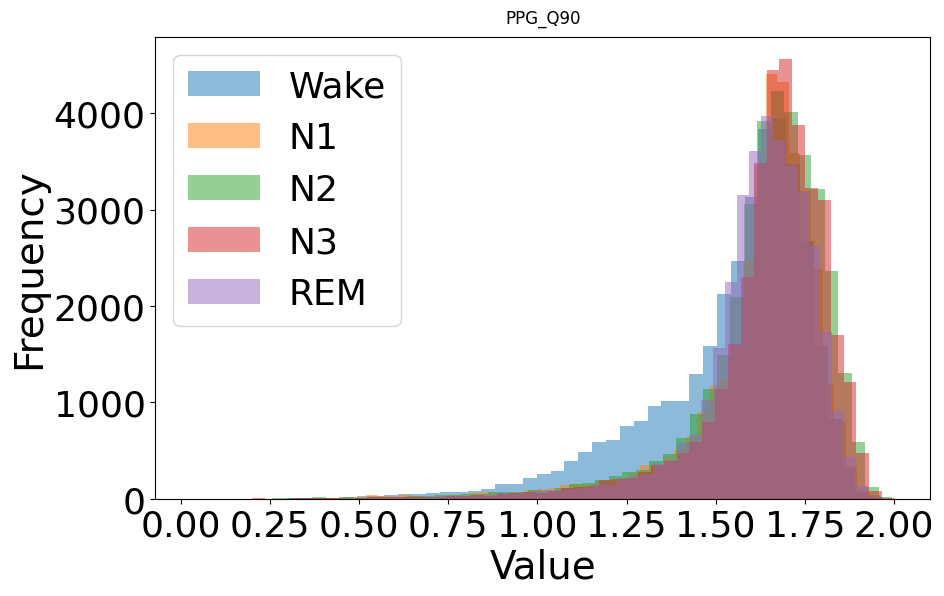

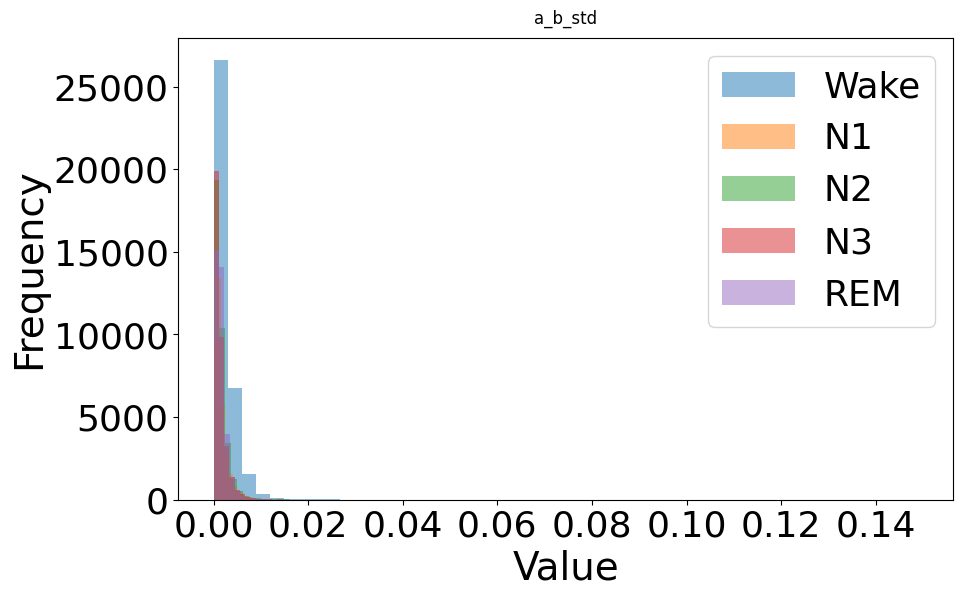

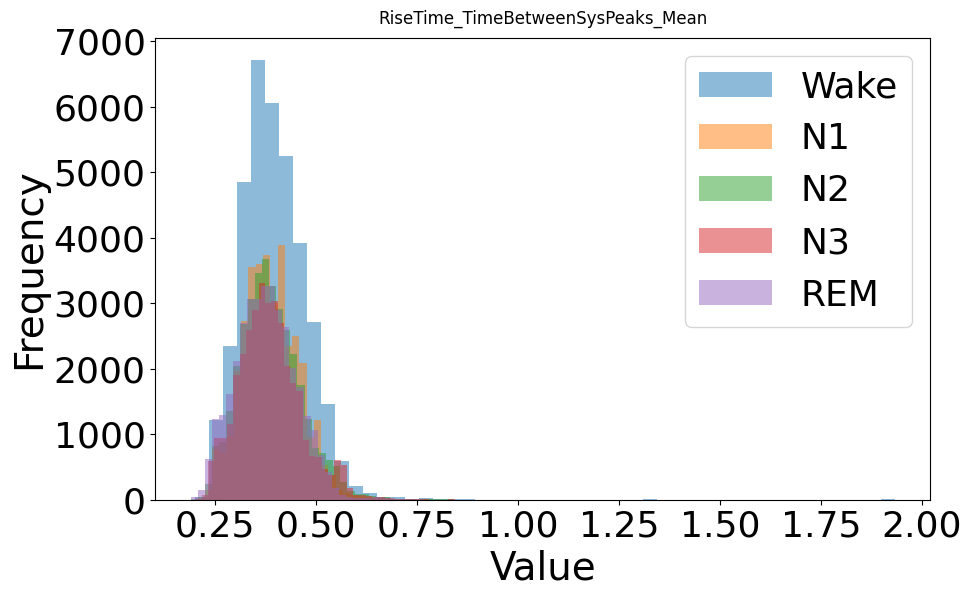

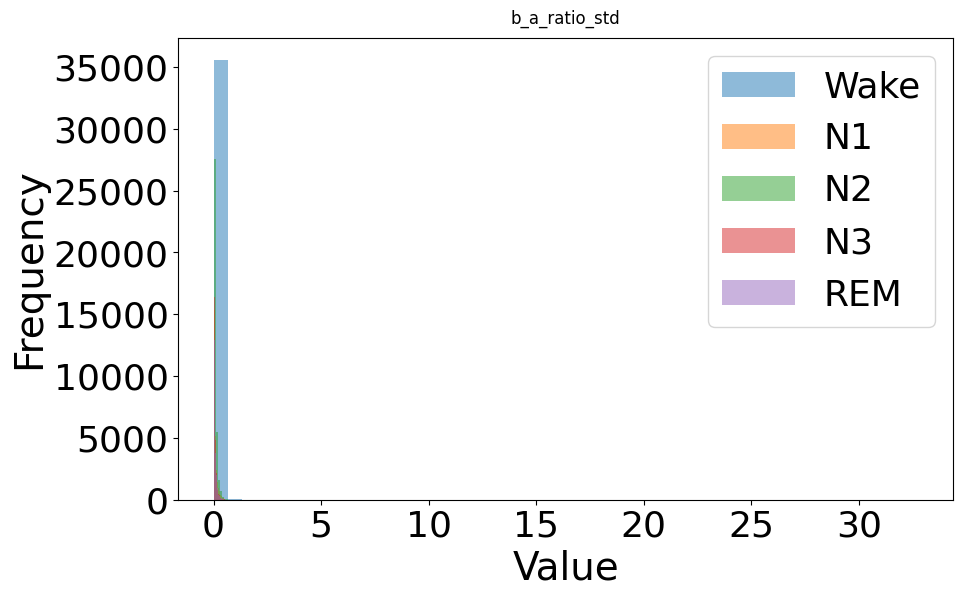

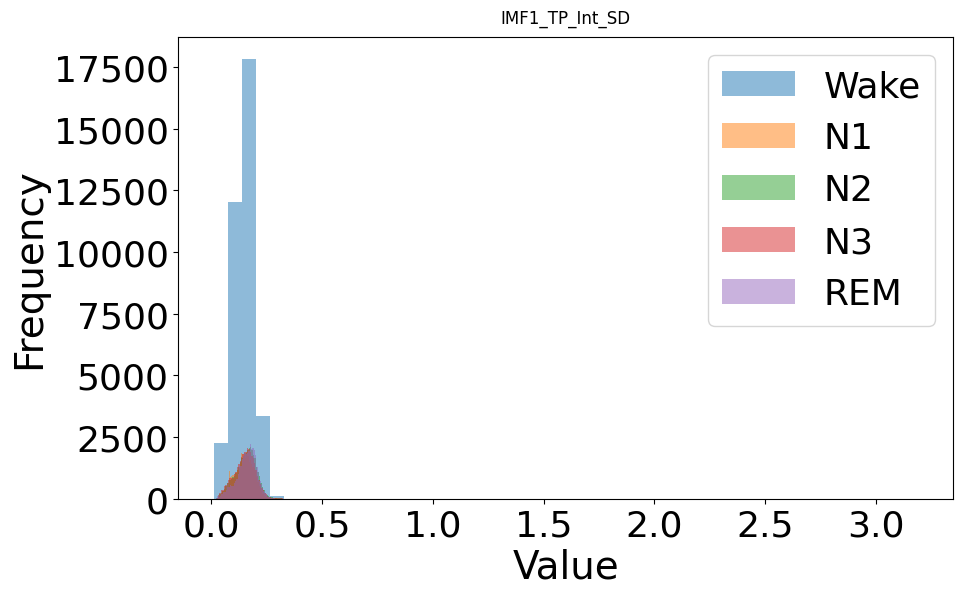

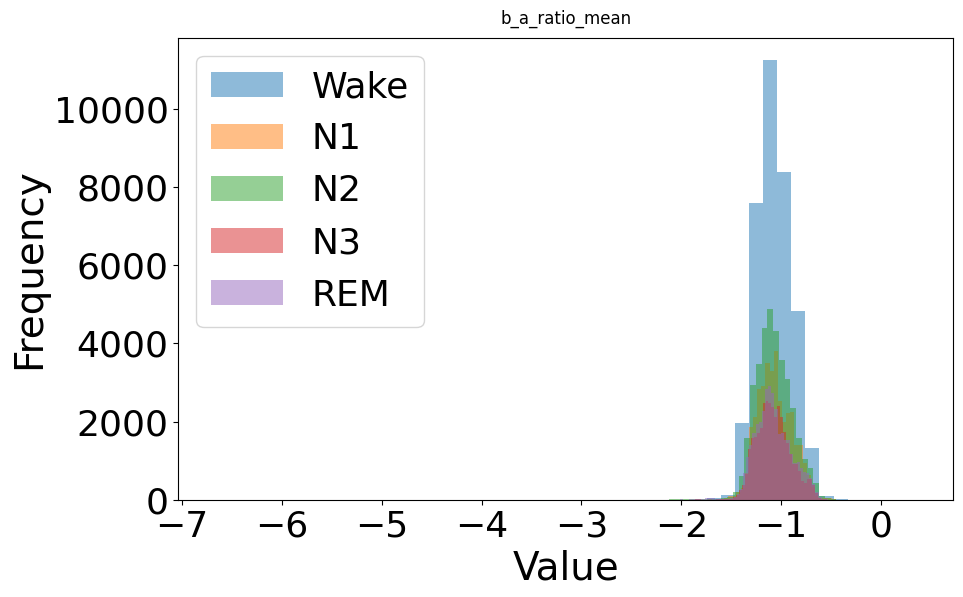

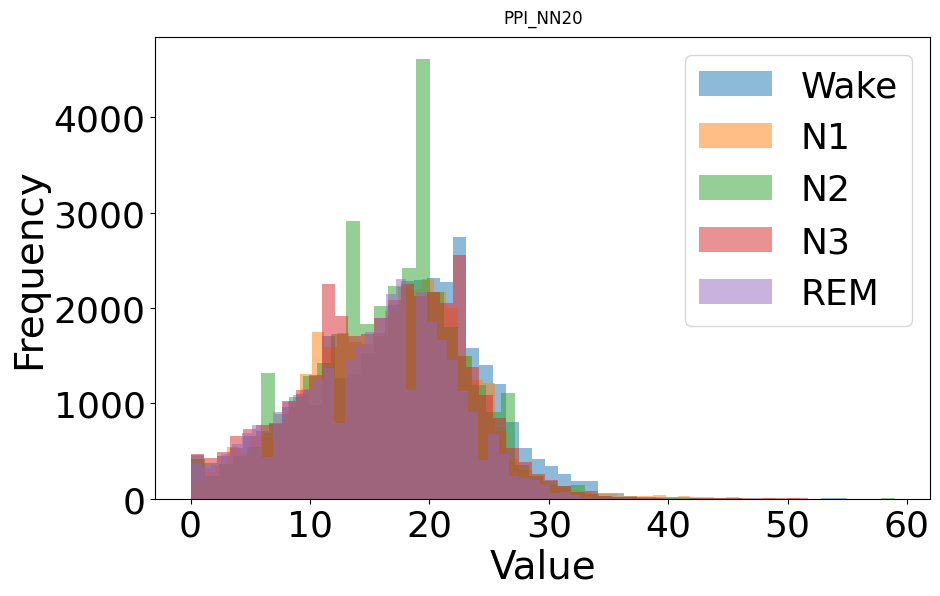

In [48]:
# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "N1",
    2: "N2",
    3: "N3",
    4: "REM"
}

# Plot histograms for each feature
# Assuming 'top_features' DataFrame and 'y_resampled' Series are already defined
top_features['class'] = y_resampled  # Add the class labels

# Exclude the 'class' column when getting feature names
feature_names = top_features.drop(columns='class').columns

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Get unique class values from the 'class' column
    for class_value in np.unique(top_features['class']):
        # Subset the data for the current class
        subset = top_features[top_features['class'] == class_value]
        # Plot histogram and use the class_labels dictionary to get the correct label
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'{feature}', pad = 10)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.legend(fontsize = 26)
    plt.xticks (fontsize = 26)
    plt.yticks (fontsize = 26)
    plt.show()


C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_25092\3211292747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = top_features['class'].map(class_mapping)


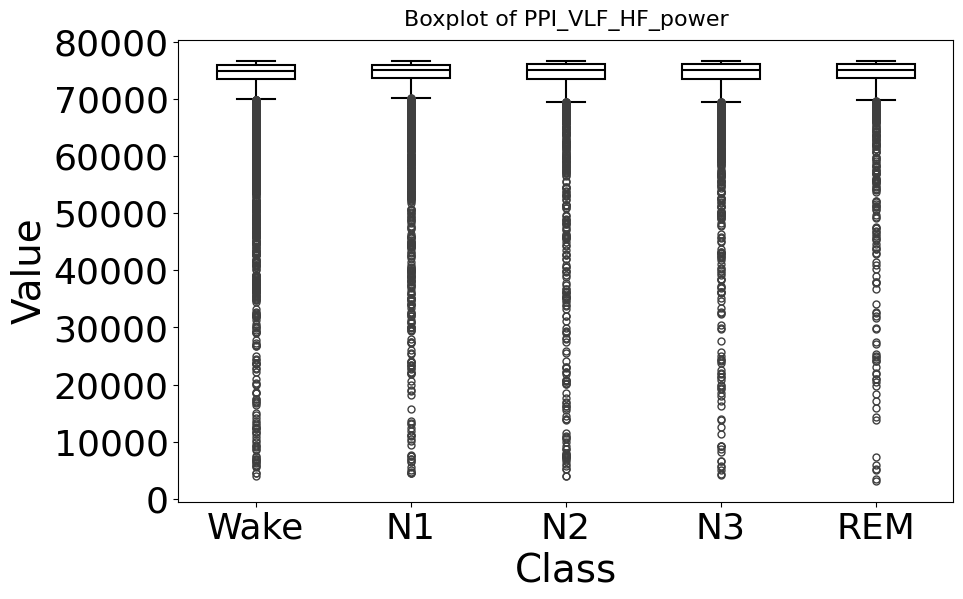

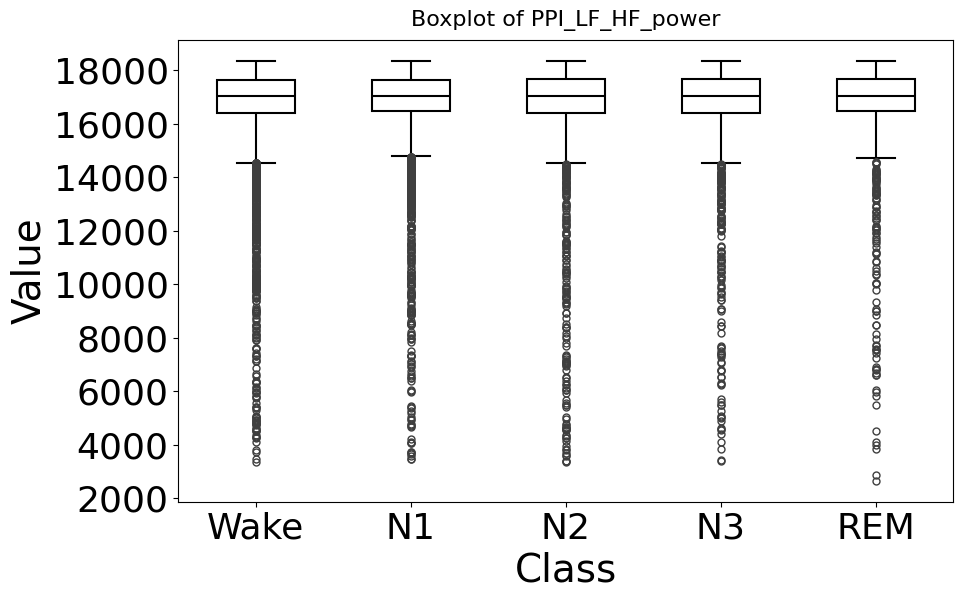

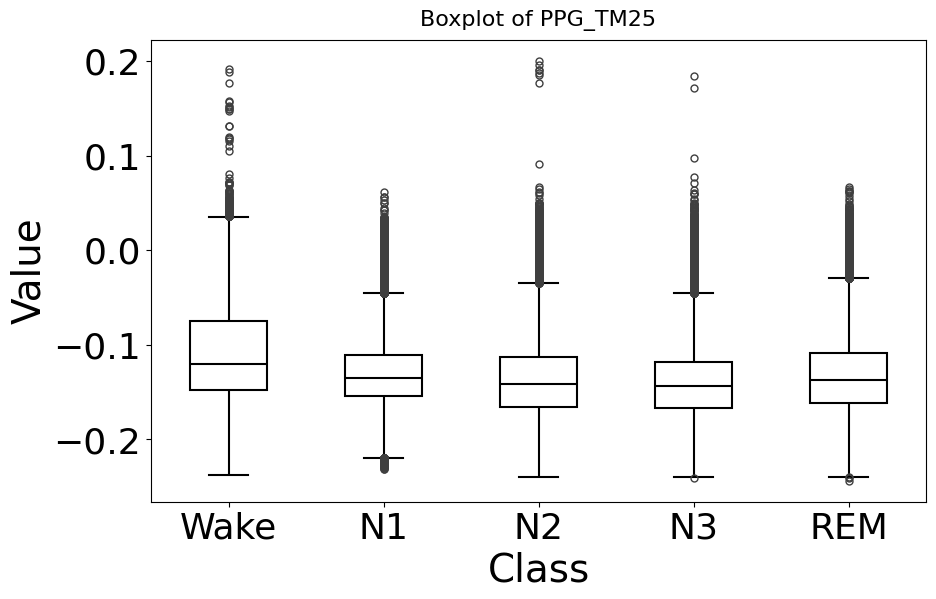

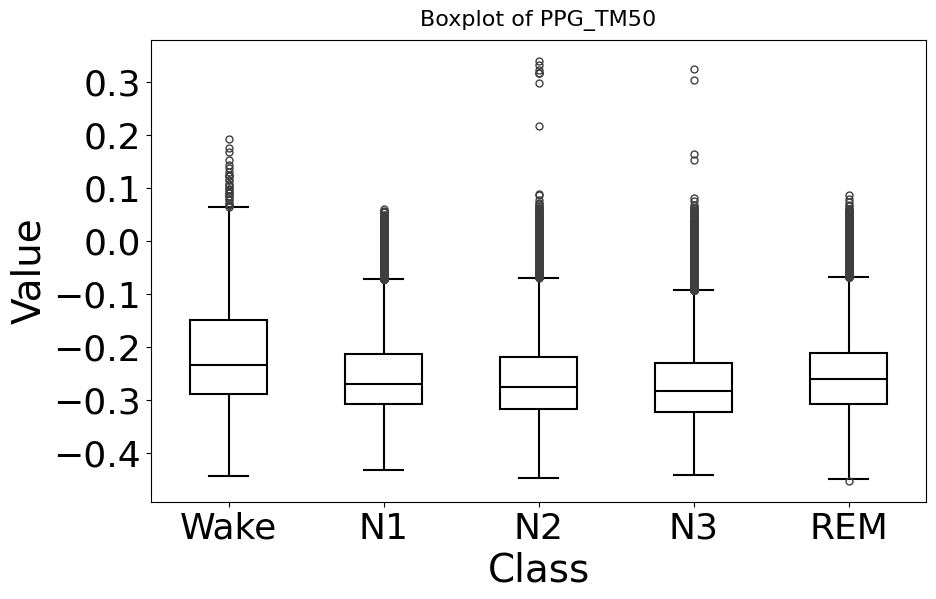

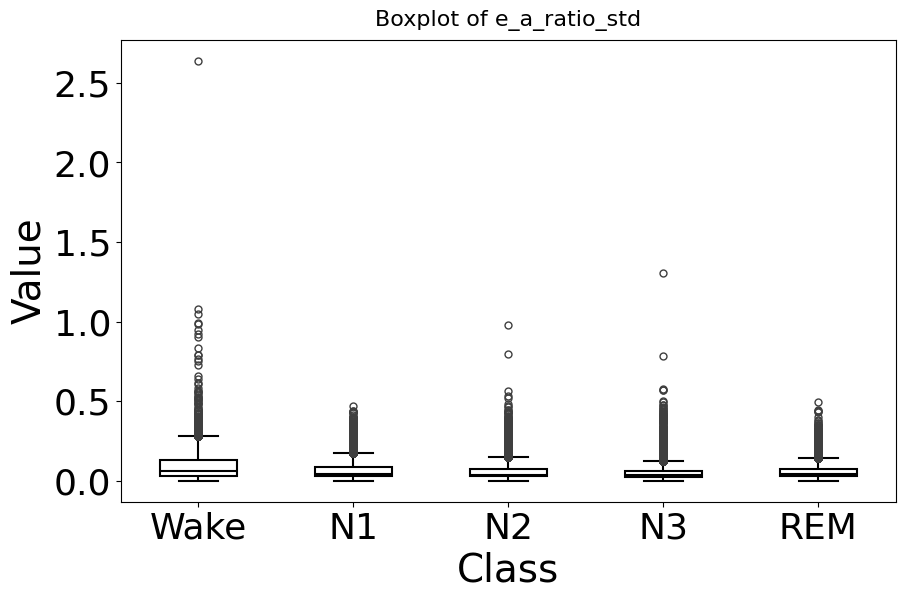

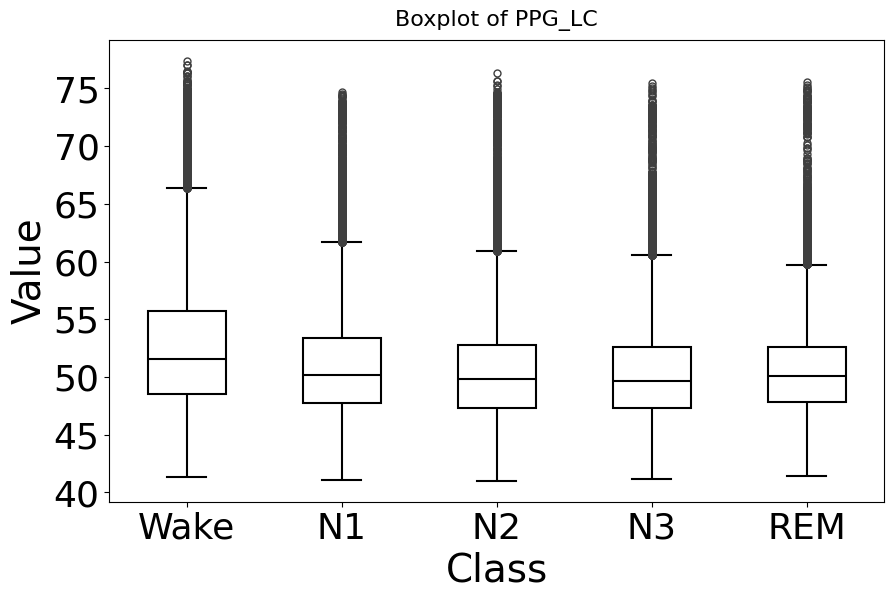

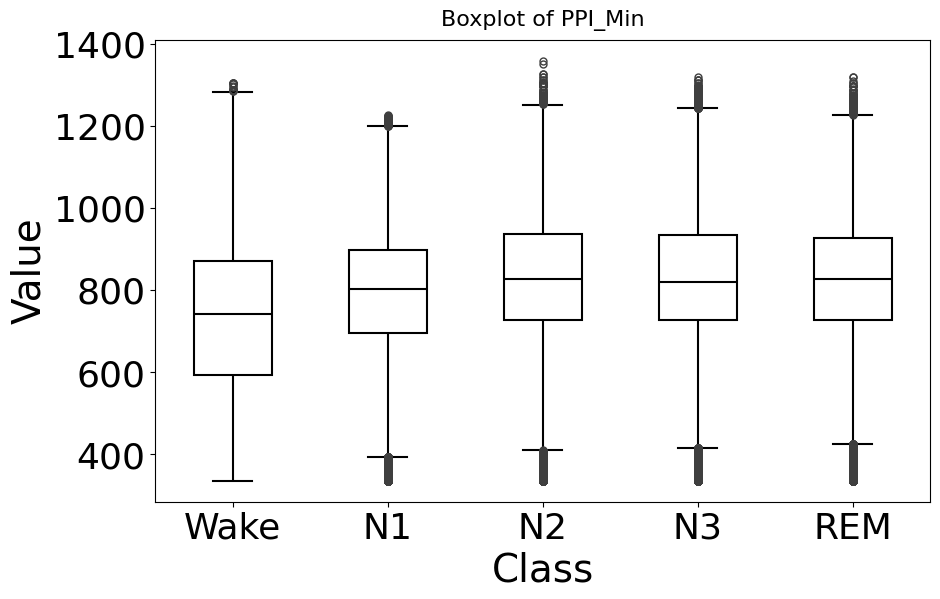

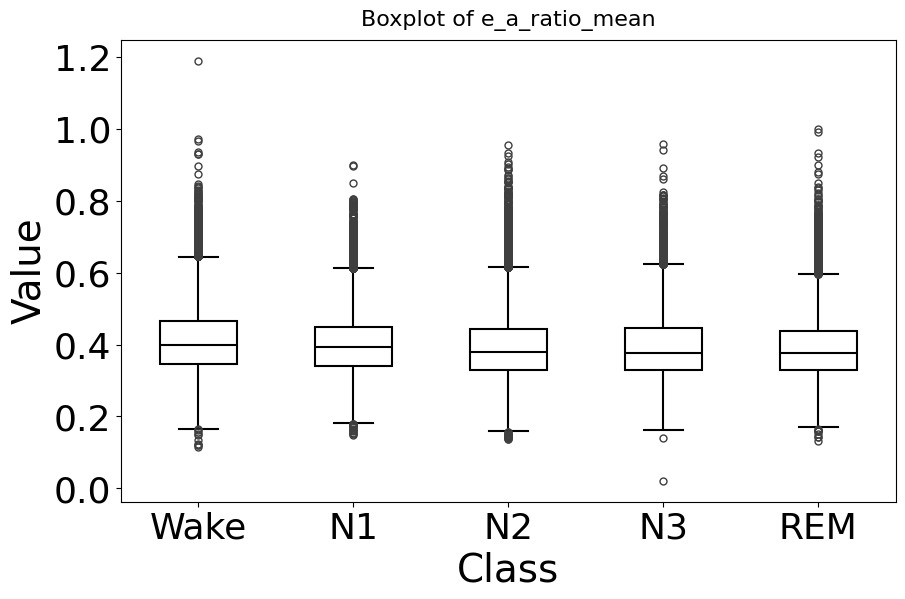

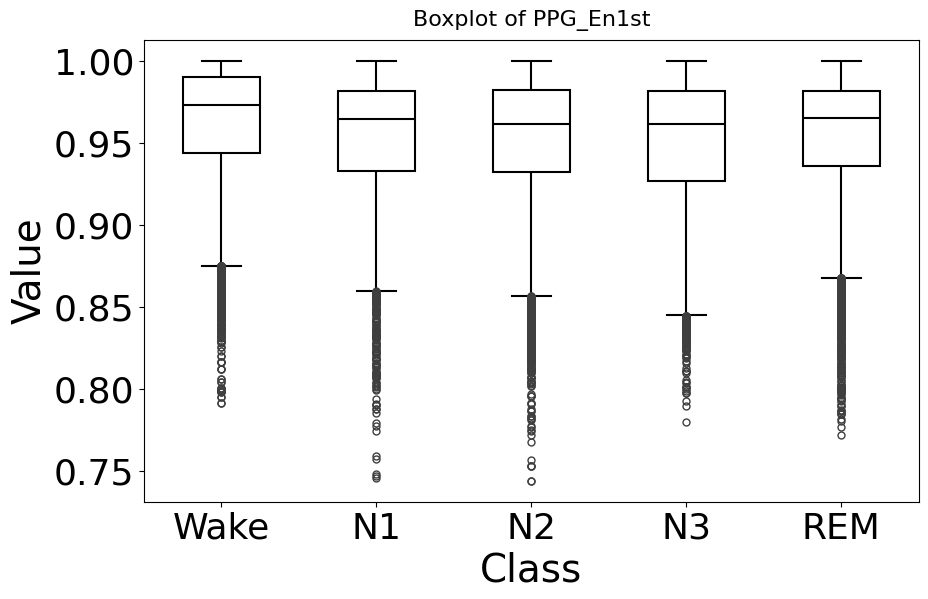

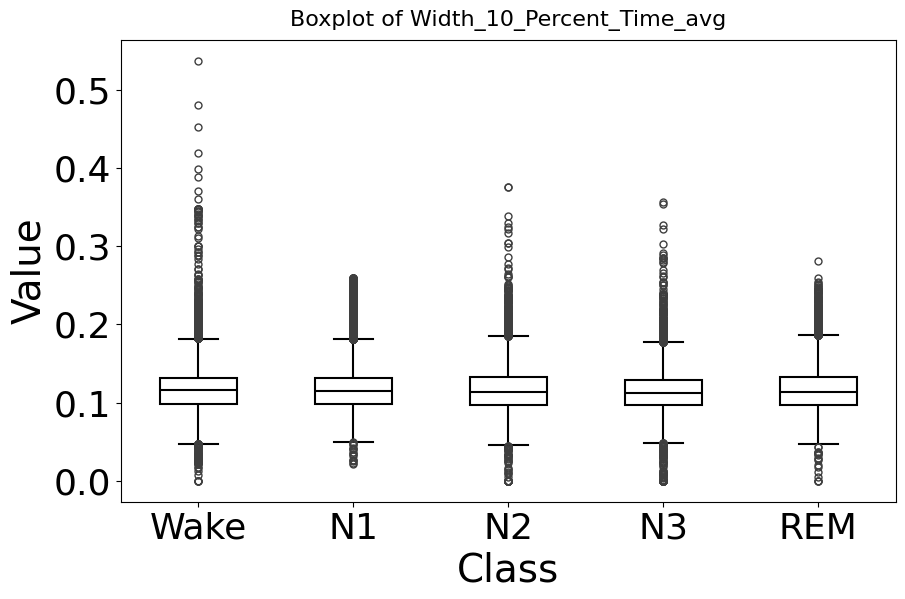

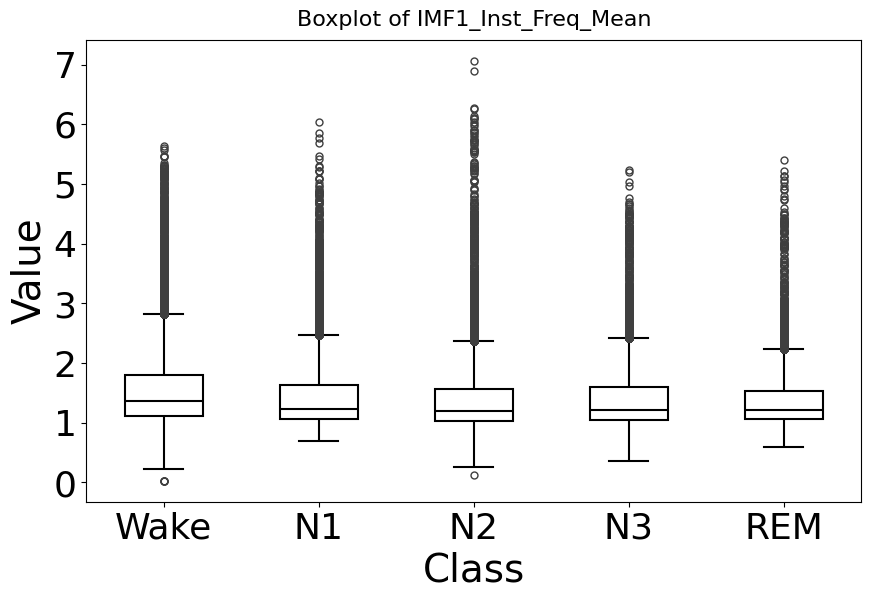

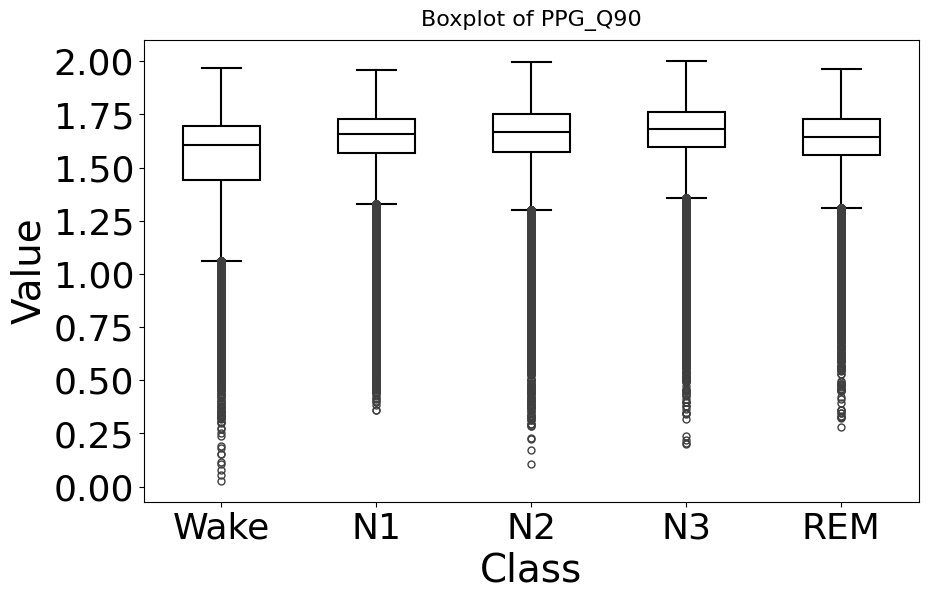

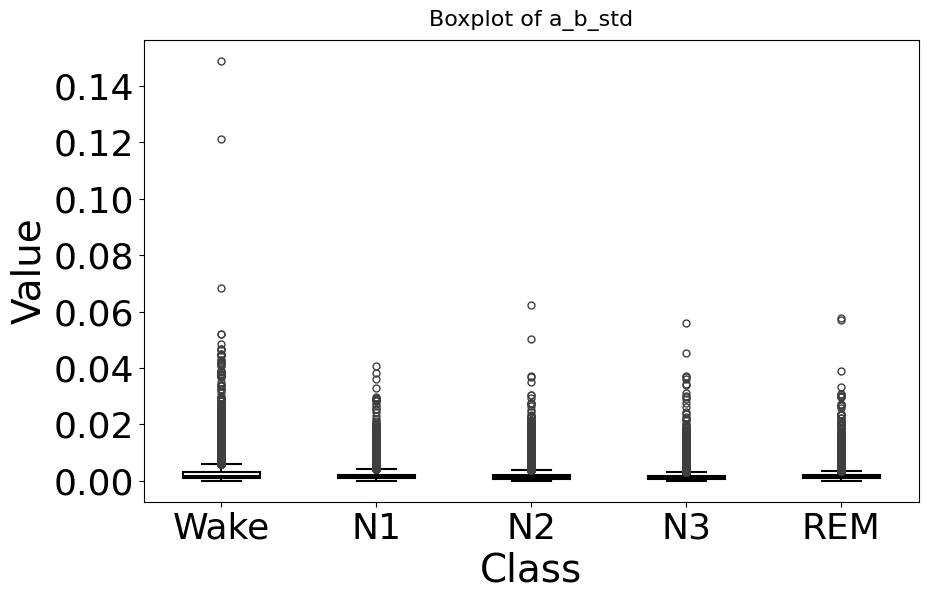

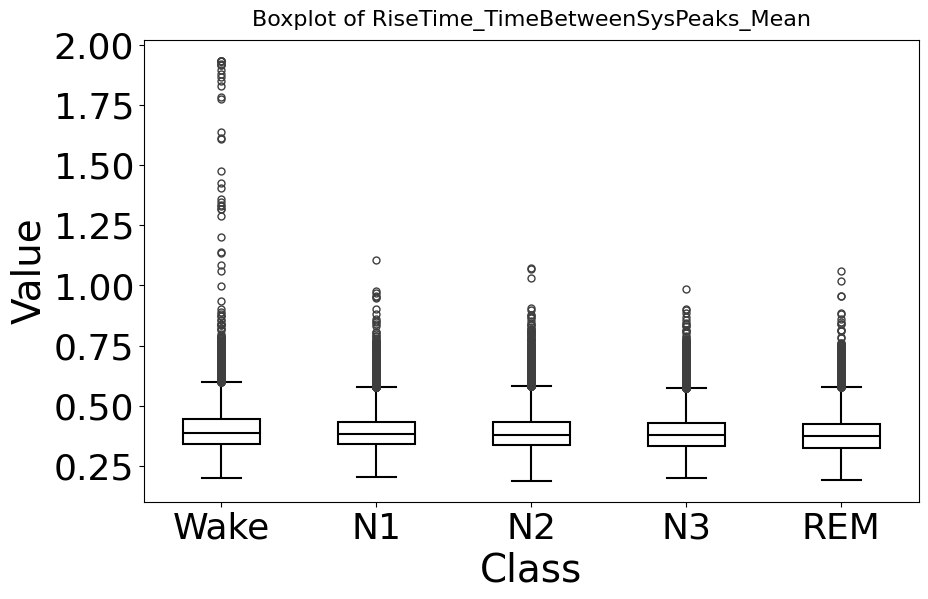

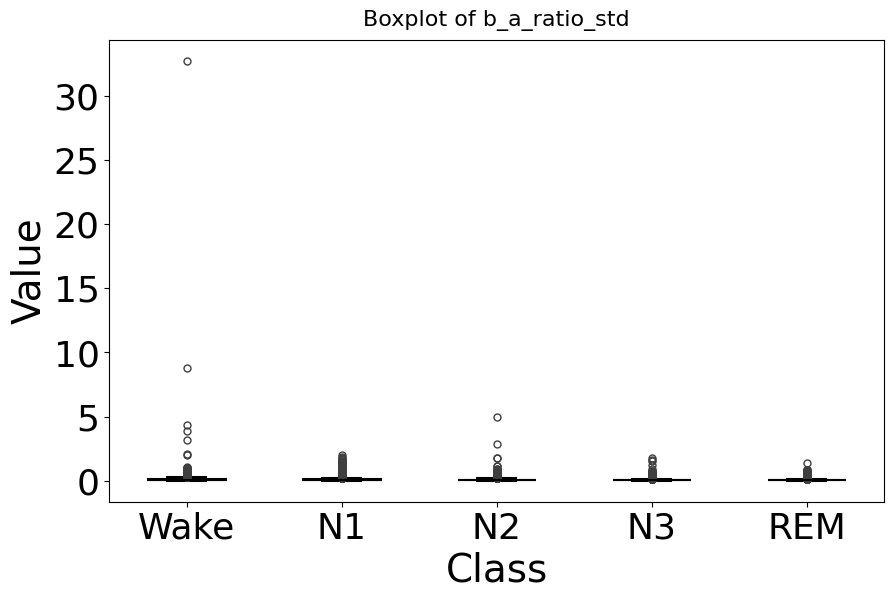

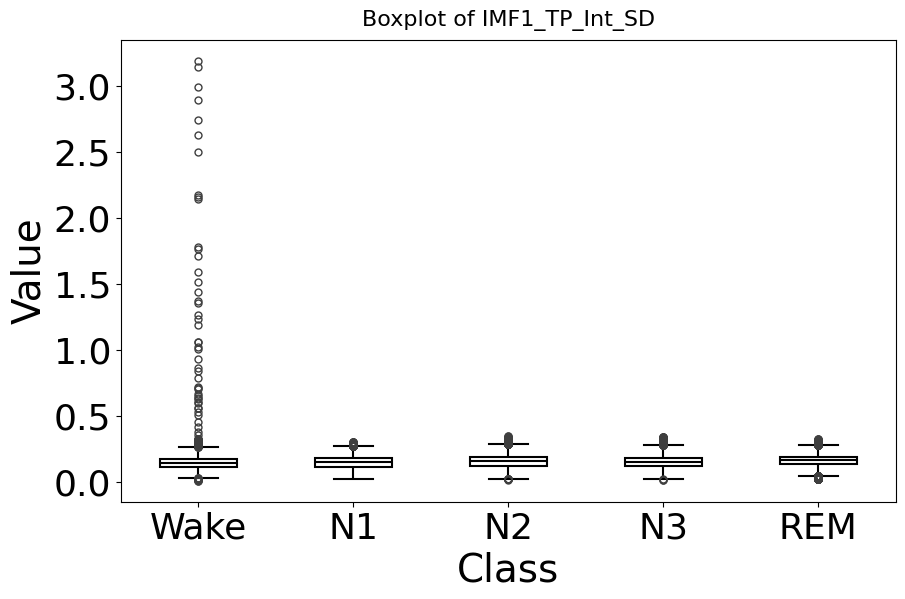

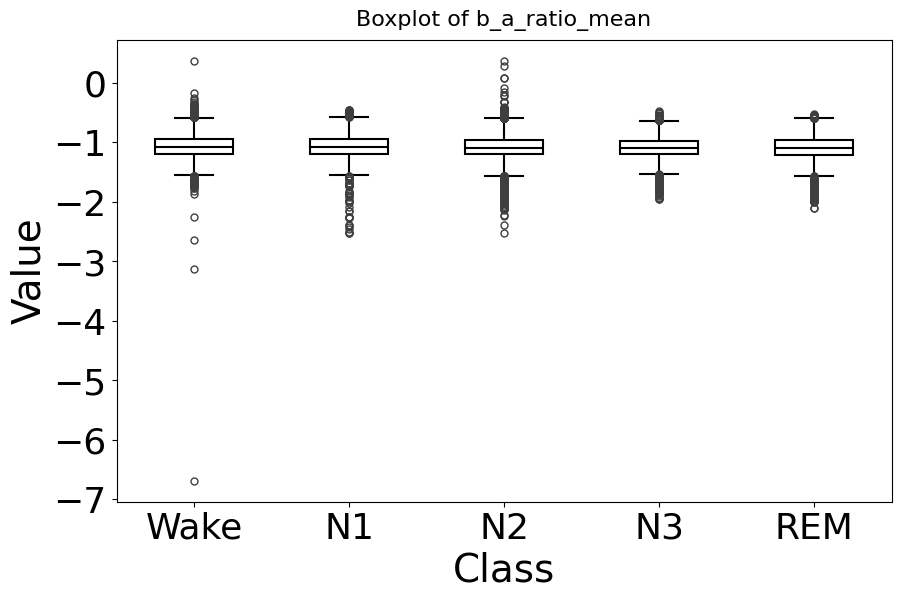

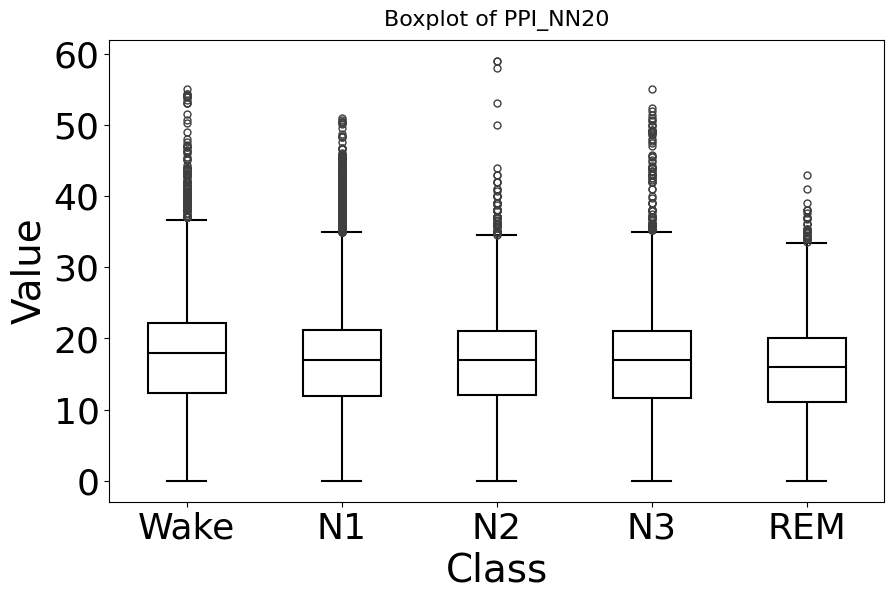

In [49]:
# First, map your 'class' column to the desired string labels
# Create a dictionary to map the class values to sleep stages
class_mapping = {0: "Wake", 1: "N1", 2: "N2", 3: "N3", 4: "REM"}

# Replace the numerical class labels in your DataFrame with the string labels
top_features['class'] = top_features['class'].map(class_mapping)

feature_names = top_features.drop(columns='class').columns  # assuming 'class' column exists

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot
    sns.boxplot(x='class', y=feature, data=top_features,
                width=0.5,
                fliersize=5,
                linewidth=1.5,
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},
                whiskerprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'color': 'black'})

    plt.title(f'Boxplot of {feature}', fontsize=16, pad= 10)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)

    # Set x-ticks labels according to the class labels
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    plt.show()


In [47]:
# Convert the list to a DataFrame
df_to_drop = pd.DataFrame(to_drop, columns=['Columns to Drop'])

# Export the DataFrame to a CSV file
df_to_drop.to_csv('columns_to_drop5_stages.csv', index=False)